![Meo_logo](./meologo.png)

# Meo ML Price
### Exploratory Data Analysis - Toyota Car Price

<hr/>

#### 1. Import all packages needed.

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import linear_model

<hr/>

#### 2. Read CSV file

In [5]:
# read csv file
dfToyota = pd.read_csv('toyota.csv')
dfToyota.head()

,nama,km,bbm,transmisi,tahun,harga
0,Kijang Innova,90,diesel,otomatis,2011,171
1,Kijang Innova,10,bensin,otomatis,2018,268
2,Kijang Innova,60,bensin,manual,2014,172
3,Kijang Innova,90,bensin,manual,2012,137
4,Kijang Innova,45,diesel,manual,2012,205


<hr/>

#### 3. Create dummy variables for features: nama, bbm & transmisi

In [7]:
dfDummies = pd.get_dummies(dfToyota[['nama', 'bbm', 'transmisi']])
list(dfDummies.columns.values)

['nama_Alphard',
 'nama_Avanza',
 'nama_Calya',
 'nama_Kijang Innova',
 'nama_Sienta',
 'nama_Vellfire',
 'nama_Veloz',
 'nama_Venturer',
 'nama_Voxy',
 'bbm_bensin',
 'bbm_diesel',
 'transmisi_manual',
 'transmisi_otomatis']

<hr/>

#### 4. Merge dfToyota & dfDummies, separate its X feature & Y target

In [11]:
dfToyota = pd.concat([dfToyota, dfDummies], axis='columns')
dfToyota = dfToyota.drop(['nama', 'bbm', 'transmisi'], axis='columns')

dfToyotaX = dfToyota.drop(['harga'], axis='columns')
dfToyotaY = dfToyota['harga']

In [12]:
dfToyotaX.head()

,km,tahun,nama_Alphard,nama_Avanza,nama_Calya,nama_Kijang Innova,nama_Sienta,nama_Vellfire,nama_Veloz,nama_Venturer,nama_Voxy,bbm_bensin,bbm_diesel,transmisi_manual,transmisi_otomatis
0,90,2011,0,0,0,1,0,0,0,0,0,0,1,0,1
1,10,2018,0,0,0,1,0,0,0,0,0,1,0,0,1
2,60,2014,0,0,0,1,0,0,0,0,0,1,0,1,0
3,90,2012,0,0,0,1,0,0,0,0,0,1,0,1,0
4,45,2012,0,0,0,1,0,0,0,0,0,0,1,1,0


In [14]:
dfToyotaY[:5]

0    171
1    268
2    172
3    137
4    205
Name: harga, dtype: int64

<hr/>

#### 5. See its features correlation (target: harga)

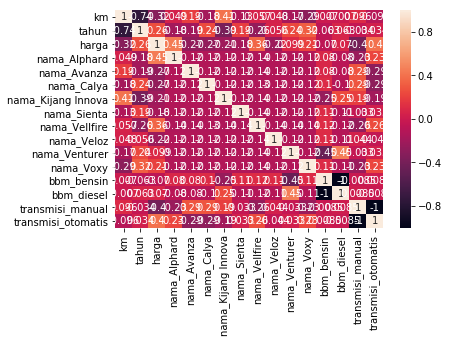

In [15]:
# plot correlation heatmap
sb.heatmap(dfToyota.corr(), annot=True)
plt.show()

<hr/>

#### 6. Splitting dataset: 10% testing & 90% training

In [18]:
# train test split | test = 10% & training = 90%
x_train, x_test, y_train, y_test = train_test_split(dfToyotaX, dfToyotaY, test_size=.1)
list(x_train.columns.values)

['km',
 'tahun',
 'nama_Alphard',
 'nama_Avanza',
 'nama_Calya',
 'nama_Kijang Innova',
 'nama_Sienta',
 'nama_Vellfire',
 'nama_Veloz',
 'nama_Venturer',
 'nama_Voxy',
 'bbm_bensin',
 'bbm_diesel',
 'transmisi_manual',
 'transmisi_otomatis']

<hr/>

#### 7. Multivariate Linear Regression

In [19]:
# multivariate linear regression
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# nilai gradien m
reg.coef_

array([ 4.08940355e-02,  3.42042471e+01,  3.47605952e+02, -8.01786463e+01,
       -2.39746324e+02,  1.28027913e+01, -1.62639143e+02,  2.72811090e+02,
       -1.37761200e+02, -3.18360478e+01,  1.89415269e+01, -1.82112266e+01,
        1.82112266e+01, -1.46980625e+00,  1.46980625e+00])

In [21]:
# nilai intercept b
reg.intercept_

-68623.3342738478

In [22]:
# score
reg.score(x_test, y_test) * 100

76.20914037350774

In [26]:
# prediksi: Alphard 5km 2015 bensin otomatis
kmth = [5,2015]
mobil = [1,0,0,0,0,0,0,0,0]
bbm = [1,0]
transmisi = [0,1]

data = np.array(kmth + mobil + bbm + transmisi)
reg.predict([data])[0]

629.292703623476